# Project: Investigate The Movie Database: What makes a movie popular?
## Is there a secret to gaining success?


### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Write my introduction below:

In this project I have chosen to investigate a dataset from the movie database, which was provided by Udacity and can be found here at [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

I will seek to answer questions from the information provided from the data using python and libraries such as numpy, pandas and utilising matplotlib and seaborn for visualisation.

### Questions that we'll want to ask and investigate
1. Which genres are most popular from year to year?
2. Actor popularity: Which actors/actresses are more cast than others?
2. What kinds of properties are associated with movies that have high ratings and/or popularity?
    1. Does a higher budget correlate with increased revenue?
    2. Does runtime correlate with increased revenue?
    3. Does a higher vote average correlate with the increased revenue?
    4. Does popularity correlate with a higher revenue?
***

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette(palette='husl', color_codes=True)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading data
# Read csv into dataframe
df = pd.read_csv('tmdb-movies.csv')

# making sure that the scientific notation seen originally the in dataset becomes floats instead,
# for human-eye readability
pd.set_option('display.float_format', lambda x: '%.5f' % x) # see in references where I found the source of this code.

In [3]:
# getting a grasp of the set we're working with, I want to see info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# We have an overview of several columns with no non-nulls, and a few with non-nulls
# Now lets get a look at the data in a spreadsheet view

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,tt1392190,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,tt2908446,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,tt2488496,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,tt2820852,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052


In [5]:
# How many unique values are there in each column?
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
# Potential duplicates
# id and imdb_id should all be unique values, as they are helping to index the rest of the data.
# Otherwise it might be the case that they are in fact duplicates which will be explored further.

df.duplicated().sum()

1

In [7]:
# So then we have one duplicate row. Lets find it.
df_dup = df[df.duplicated(keep=False)]
df_dup.head()
# Tekken will be removed as can be seen below, they are exactly identical.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00000,2010,30000000.00000,967000.00000
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00000,2010,30000000.00000,967000.00000


In [8]:
# Checking to see what is behind each object item, just to be more familiar with the dataset and to know how to handle
# eventual cleanup of data for these columns.

print('imdb_id: ', type(df['imdb_id'][0]))
print('original_title: ', type(df['original_title'][0]))
print('cast: ', type(df['cast'][0]))
print('homepage: ', type(df['homepage'][0]))
print('director: ', type(df['director'][0]))
print('tagline: ', type(df['tagline'][0]))
print('keywords: ', type(df['keywords'][0]))
print('overview: ', type(df['overview'][0]))
print('genres: ', type(df['genres'][0]))
print('production_companies: ', type(df['production_companies'][0]))
print('release_date: ', type(df['release_date'][0]))

# As can be seen below, all of the objects are pointers and in fact strings.
# Not much cleaning will be needed but a few columns will be dropped.

imdb_id:  <class 'str'>
original_title:  <class 'str'>
cast:  <class 'str'>
homepage:  <class 'str'>
director:  <class 'str'>
tagline:  <class 'str'>
keywords:  <class 'str'>
overview:  <class 'str'>
genres:  <class 'str'>
production_companies:  <class 'str'>
release_date:  <class 'str'>


In [9]:
# Investigating null(s)
df.isnull().sum()

# id is important for index, while imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production companies
# have nulls. For the sake of integrity, whenever these columns will be used in any analysis these rows will be dropped,
# due to the nature of the data in the columns are all strings (except for imdb_id) and thus can't be filled in.

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Initial thoughts:

- cast, genres, production companies are all lists in the form strings separated by '|'.
- drop the duplicate
- budget and revenue have adjusted columns that we'll use instead and will drop the initial budget and revenue columns. However, they have scientific notation that will be changed globally.
- I will divide my analysis into three different parts for my analysis: one dataframe for genre, one for cast, and another one for the quantitative data.
    - cast and genre data will need some handling to split the '|' strings of several actors and genres.
    - in order to preserve as much quantitative data, I will create a dataframe for this dropping: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies. Thus I will have gotten rid on NaNs and only use data that is quantifiable and not bother with erasing rows of NaNs and ending up with fewer rows of usable data.
- I have wondered how to view and understand the score for popularity, which can be detailed at their website:
    - https://developers.themoviedb.org/3/getting-started/popularity#movies
        Movies:
            Number of votes for the day
            Number of views for the day
            Number of users who marked it as a "favourite" for the day
            Number of users who added it to their "watchlist" for the day
            Release date
            Number of total votes
            Previous days score
- Since, I won't use release_date I won't change the format to datetime using to_datetime() as I only need to rely on release_year to perform my analysis and to answer my questions.
- Lastly, since I will focus on cast, genre and quantifiable variables to determine vote_average and popularity, these columns will be dropped for the dataset in general:
    - imdb_id
    - budget (duplicate column)
    - revenue (duplicate column)
    - homepage
    - tagline
    - keywords
    - overview
    - production companies

# Data Cleaning up the not so fluffy parts!
## This section will focus on the parts:
### The general cleanup
Before proceeding with the next steps I will focus on the general cleanup that supports the next steps and division of dataframes. This includes dropping duplicates, dropping columns that won't be utilised for any part of this analysis. Dealing with nulls for a more general perspective (if needed).
### 1. Quantitative dataframe
For this I want as many rows as possible for more available data. Most string type columns will be dropped.
### 2. A dataframe for genres
A dataframe where I will focus on stacking the '|' separated genres into several rows
### 3. A dataframe for actors
A dataframe with the same focus as the genres column, but found in the cast column, that needs similar processing as the genres column as it is also separated by '|' and will be stacked into multiple rows.

#### Starting the cleanup!
1. Get rid of the duplicate

In [10]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [11]:
#Dropping these columns as described in 'initial thoughts': imdb_id, budget (duplicate column), revenue (duplicate column), homepage, tagline, keywords, overview, production companies
df.drop(columns=['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], inplace=True)



In [12]:
# Checking to see how the dataframe looks after dropping columns.
df.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.98576,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,28.41994,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,13.11251,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,11.17310,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,9.33501,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052


In [13]:
# Checking null values again. probably will be much better.
df.isnull().sum()

id                 0
popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

### 1. Creating the dataframe for Quant Data

In [14]:
# DataFrame for the 'quant' data
df_quant = df

In [15]:
df_quant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   original_title  10865 non-null  object 
 3   cast            10789 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10865 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      10865 non-null  float64
 12  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [16]:
df_quant.drop(columns=['cast', 'director', 'genres'])

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.98576,Jurassic World,124,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,28.41994,Mad Max: Fury Road,120,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,13.11251,Insurgent,119,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,11.17310,Star Wars: The Force Awakens,136,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,9.33501,Furious 7,137,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052
...,...,...,...,...,...,...,...,...,...,...
10861,21,0.08060,The Endless Summer,95,6/15/66,11,7.40000,1966,0.00000,0.00000
10862,20379,0.06554,Grand Prix,176,12/21/66,20,5.70000,1966,0.00000,0.00000
10863,39768,0.06514,Beregis Avtomobilya,94,1/1/66,11,6.50000,1966,0.00000,0.00000
10864,21449,0.06432,"What's Up, Tiger Lily?",80,11/2/66,22,5.40000,1966,0.00000,0.00000


* * *
##### And we're done with the quant dataframe (for now)
* * *

### 2. Creating the dataframe for genres

In [17]:
# DataFrame for genres
df_genres = df

In [18]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   original_title  10865 non-null  object 
 3   cast            10789 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10865 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      10865 non-null  float64
 12  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [19]:
# Making sure to eliminate nulls
df_genres.isnull().sum()

id                 0
popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [20]:
# Dropping nulls
df_genres.dropna(inplace=True)

In [21]:
# Slicing out the columns that i want for the genres dataframe using .loc
df_genres = df.loc[:, ['id','genres', 'release_year', 'popularity', 'vote_average']]
df_genres.head()

,id,genres,release_year,popularity,vote_average
0,135397,Action|Adventure|Science Fiction|Thriller,2015,32.98576,6.50000
1,76341,Action|Adventure|Science Fiction|Thriller,2015,28.41994,7.10000
2,262500,Adventure|Science Fiction|Thriller,2015,13.11251,6.30000
3,140607,Action|Adventure|Science Fiction|Fantasy,2015,11.17310,7.50000
4,168259,Action|Crime|Thriller,2015,9.33501,7.30000


In [22]:
# Splitting the genres column into a list and indexing it with the id column
# Here I got inspiration from a blog on how to do this code, please see references!

# Creating a function due to the project requirements and the input of my reviever

def separate(df_column, df_id):
    return pd.DataFrame(df_column.str.split('|').tolist(), index=df_id).stack()

clean_genre = separate(df_genres.genres, df_genres.id)
#clean_genre = pd.DataFrame(df_genres.genres.str.split('|').tolist(), index=df_genres.id).stack() <-- Previous code
clean_genre.head(20)

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
262500  0          Adventure
        1    Science Fiction
        2           Thriller
140607  0             Action
        1          Adventure
        2    Science Fiction
        3            Fantasy
168259  0             Action
        1              Crime
        2           Thriller
281957  0            Western
        1              Drama
dtype: object

In [23]:
# resetting index so that the series can become a dataframe instead so the values for actor names aren't duplicates
clean_genre = clean_genre.reset_index([0, 'id'])
clean_genre.head(20)

,id,0
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action
5,76341,Adventure
6,76341,Science Fiction
7,76341,Thriller
8,262500,Adventure
9,262500,Science Fiction


In [24]:
# renaming the name column from 0 to Genre
clean_genre.rename(columns={0 : 'genre'}, inplace=True)

In [25]:
# merging the original genres dataframe with our initial and separated genres list
# merging on the left so we keep the separated genre columns 
stacked_genre = pd.merge(clean_genre, df_genres, how='left', on='id')
stacked_genre.head()

,id,genre,genres,release_year,popularity,vote_average
0,135397,Action,Action|Adventure|Science Fiction|Thriller,2015,32.98576,6.50000
1,135397,Adventure,Action|Adventure|Science Fiction|Thriller,2015,32.98576,6.50000
2,135397,Science Fiction,Action|Adventure|Science Fiction|Thriller,2015,32.98576,6.50000
3,135397,Thriller,Action|Adventure|Science Fiction|Thriller,2015,32.98576,6.50000
4,76341,Action,Action|Adventure|Science Fiction|Thriller,2015,28.41994,7.10000


In [26]:
# removing the initial genres column
stacked_genre.drop(columns='genres', inplace=True)
stacked_genre.head()

,id,genre,release_year,popularity,vote_average
0,135397,Action,2015,32.98576,6.50000
1,135397,Adventure,2015,32.98576,6.50000
2,135397,Science Fiction,2015,32.98576,6.50000
3,135397,Thriller,2015,32.98576,6.50000
4,76341,Action,2015,28.41994,7.10000


In [27]:
# cheking for non-nulls
stacked_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26753 entries, 0 to 26752
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            26753 non-null  int64  
 1   genre         26753 non-null  object 
 2   release_year  26753 non-null  int64  
 3   popularity    26753 non-null  float64
 4   vote_average  26753 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ MB


* * *
##### And we're done with the genres dataframe for now! It all looks good.
* * *

### 3. Creating the DataFrame for Actors in Cast

In [28]:
# DataFrame for Actors (cast)
df_cast = df

In [29]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   original_title  10731 non-null  object 
 3   cast            10731 non-null  object 
 4   director        10731 non-null  object 
 5   runtime         10731 non-null  int64  
 6   genres          10731 non-null  object 
 7   release_date    10731 non-null  object 
 8   vote_count      10731 non-null  int64  
 9   vote_average    10731 non-null  float64
 10  release_year    10731 non-null  int64  
 11  budget_adj      10731 non-null  float64
 12  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [30]:
# Selecting the columns we want for the cast_dataframe
df_cast = df.loc[:, ['id','cast', 'release_year', 'popularity', 'vote_average']]
df_cast.head()

,id,cast,release_year,popularity,vote_average
0,135397,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,32.98576,6.50000
1,76341,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,2015,28.41994,7.10000
2,262500,Shailene Woodley|Theo James|Kate Winslet|Ansel...,2015,13.11251,6.30000
3,140607,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2015,11.17310,7.50000
4,168259,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,2015,9.33501,7.30000


In [31]:
# double-checking to see if its null
df_cast.isnull().sum()

id              0
cast            0
release_year    0
popularity      0
vote_average    0
dtype: int64

In [32]:
# Creating clean_actor as pd series from the cast dataframe
# Here I got inspiration from a blog on how to do this code, please see references!
# Using the separate function created in to split genres

clean_actor = separate(df_cast.cast, df_cast.id)
#clean_actor = pd.DataFrame(df_cast.cast.str.split('|').tolist(), index=df_cast.id).stack() # <-- Previous code
clean_actor.head()

id       
135397  0            Chris Pratt
        1    Bryce Dallas Howard
        2            Irrfan Khan
        3      Vincent D'Onofrio
        4          Nick Robinson
dtype: object

In [33]:
# Resetting index
clean_actor = clean_actor.reset_index([0, 'id'])
clean_actor.head()

,id,0
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


In [34]:
# Renaming clean actor column, from 0 to Actor
clean_actor.rename(columns={0: 'actor'}, inplace=True)
clean_actor.head()

,id,actor
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


In [35]:
# Merging a new stacked_actor df with clean_actor and df_cast 
stacked_actor = pd.merge(clean_actor, df_cast, how='left', on='id')
stacked_actor.head()

,id,actor,cast,release_year,popularity,vote_average
0,135397,Chris Pratt,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,32.98576,6.50000
1,135397,Bryce Dallas Howard,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,32.98576,6.50000
2,135397,Irrfan Khan,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,32.98576,6.50000
3,135397,Vincent D'Onofrio,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,32.98576,6.50000
4,135397,Nick Robinson,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,32.98576,6.50000


In [36]:
# removing the old cast column
stacked_actor.drop(columns='cast', inplace=True)
stacked_actor.head()

,id,actor,release_year,popularity,vote_average
0,135397,Chris Pratt,2015,32.98576,6.50000
1,135397,Bryce Dallas Howard,2015,32.98576,6.50000
2,135397,Irrfan Khan,2015,32.98576,6.50000
3,135397,Vincent D'Onofrio,2015,32.98576,6.50000
4,135397,Nick Robinson,2015,32.98576,6.50000


In [37]:
stacked_actor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52334 entries, 0 to 52333
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            52334 non-null  int64  
 1   actor         52334 non-null  object 
 2   release_year  52334 non-null  int64  
 3   popularity    52334 non-null  float64
 4   vote_average  52334 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.4+ MB


***
##### And we're done with the actor dataframe for now
***

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:  1. Which genres are most popular from year to year?

First, i will take a look at the head for the dataframe.

In [38]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
stacked_genre.head()

,id,genre,release_year,popularity,vote_average
0,135397,Action,2015,32.98576,6.50000
1,135397,Adventure,2015,32.98576,6.50000
2,135397,Science Fiction,2015,32.98576,6.50000
3,135397,Thriller,2015,32.98576,6.50000
4,76341,Action,2015,28.41994,7.10000


###### NOTE: 
By looking at the data and the different columns, the columns that I will use to measure the popularity of the genres, will be by counting how many movies that has been produced for each genre rather than reception in terms of popularity from the tmdb and the vote average resepctively. The reason being that the vote and popularity are actually based on movie reception rather than a single genre, as multiple genres has been used to describe the themes for movies, thus limiting the reliability for that data to be used for each stacked genre.
***

In [39]:
# Finding out the different statistics for stacked_genre
stacked_genre.describe()

,id,release_year,popularity,vote_average
count,26753.00000,26753.00000,26753.00000,26753.00000
mean,58236.09805,2000.65709,0.71024,5.95025
std,86350.20758,12.77107,1.11809,0.90943
min,5.00000,1960.00000,0.00019,1.50000
25%,10184.00000,1994.00000,0.22657,5.40000
50%,18065.00000,2005.00000,0.41431,6.00000
75%,57718.00000,2011.00000,0.77960,6.60000
max,417859.00000,2015.00000,32.98576,9.20000


In [40]:
# Finding out which genre is most popular by total count
stacked_genre['genre'].value_counts()

# stacked_genre['genre'].value_counts().plot(kind='bar', figsize=(16,8));
# plt.title('Most Popular Genre by Count')
# plt.xlabel('Genres')
# plt.ylabel('Count');


Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genre, dtype: int64

##### To make things more manageable, I will use the top five genres,
- Drama
- Comedy
- Thriller
- Action
- Romance

To compare their development in popularity in terms of produced movies over the years.
***

In [41]:
gen_year = pd.DataFrame((stacked_genre.groupby('release_year'))['genre'].value_counts())

# clean_actor = clean_actor.reset_index([0, 'id'])
#gen_year = gen_year.reset_index(['genre', 'release_year', 0])
gen_year.rename(level=0, columns={'genre':'count'}, inplace=True)
gen_year.reset_index(inplace=True)

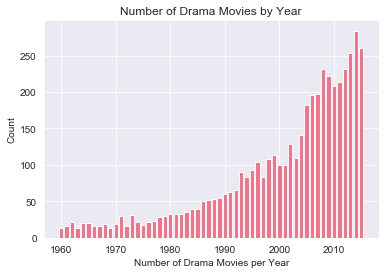

In [42]:
# no. 1 Drama Creating bar chart following the development for the genre, year on year.
drama_year = gen_year.query('genre=="Drama"')
plt.bar(drama_year['release_year'], drama_year['count'])
plt.title('Number of Drama Movies by Year')
plt.ylabel('Count')
plt.xlabel('Number of Drama Movies per Year');

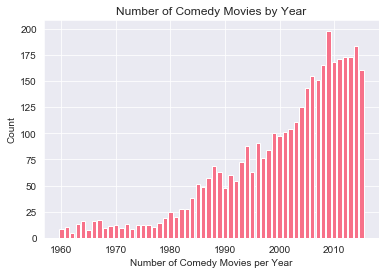

In [43]:
# no. 2 Comedy
comedy_year = gen_year.query('genre=="Comedy"')
plt.bar(comedy_year['release_year'], comedy_year['count'])
plt.title('Number of Comedy Movies by Year')
plt.ylabel('Count')
plt.xlabel('Number of Comedy Movies per Year');

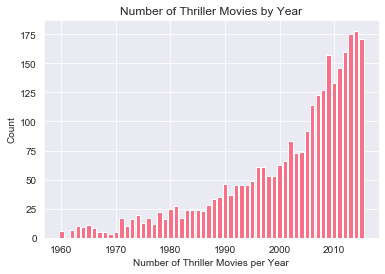

In [44]:
# no. 3 Thriller
thriller_year = gen_year.query('genre=="Thriller"')
plt.bar(thriller_year['release_year'], thriller_year['count'])
plt.title('Number of Thriller Movies by Year')
plt.ylabel('Count')
plt.xlabel('Number of Thriller Movies per Year');

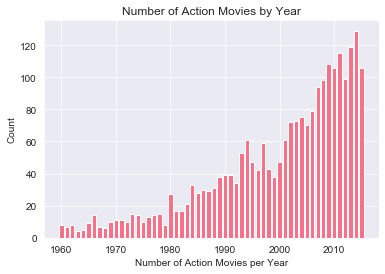

In [45]:
# no. 4 Action
action_year = gen_year.query('genre=="Action"')
plt.bar(action_year['release_year'], action_year['count'])
plt.title('Number of Action Movies by Year')
plt.ylabel('Count')
plt.xlabel('Number of Action Movies per Year');

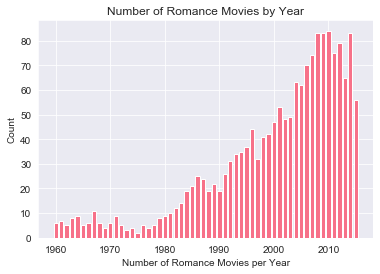

In [46]:
# no. 5 Romance
romance_year = gen_year.query('genre=="Romance"')
plt.bar(romance_year['release_year'], romance_year['count'])
plt.title('Number of Romance Movies by Year')
plt.ylabel('Count')
plt.xlabel('Number of Romance Movies per Year');

It seems like all the most popular genres have increased very similarly year on year. My question is then if it is because the number of movies produced have increased. Let's see.
***

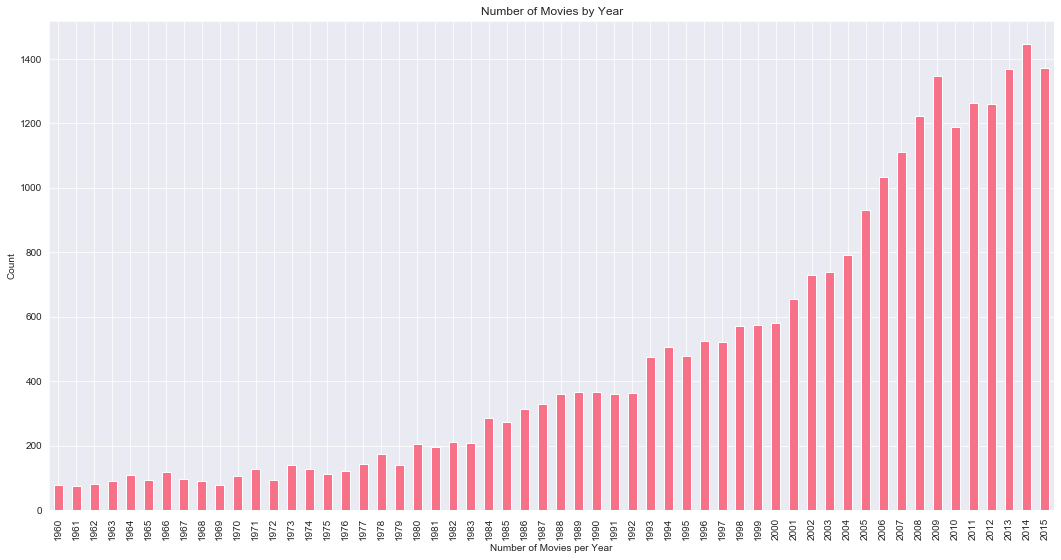

In [47]:
gen_year.groupby('release_year')['count'].sum().plot(kind='bar', figsize=(18,9))
plt.title('Number of Movies by Year')
plt.ylabel('Count')
plt.xlabel('Number of Movies per Year');

Indeed, it seems like not only has the movies increased in general, but number of movies per year follows a very similar trend as the top 5 genres themselves. Since the 90's the amount of genres has increased more year on year than before.
***

### Research Question 2 : Actor popularity: Is there a particular actor/actress that is more cast than others?

In [48]:
stacked_actor.head()

,id,actor,release_year,popularity,vote_average
0,135397,Chris Pratt,2015,32.98576,6.50000
1,135397,Bryce Dallas Howard,2015,32.98576,6.50000
2,135397,Irrfan Khan,2015,32.98576,6.50000
3,135397,Vincent D'Onofrio,2015,32.98576,6.50000
4,135397,Nick Robinson,2015,32.98576,6.50000


In [49]:
stacked_actor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52334 entries, 0 to 52333
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            52334 non-null  int64  
 1   actor         52334 non-null  object 
 2   release_year  52334 non-null  int64  
 3   popularity    52334 non-null  float64
 4   vote_average  52334 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.4+ MB


###### NOTE: 
Just like with the genre dataframe, by looking at the data and the different columns, I will use a similar way to look at the cast and the count of movies that they have starred in to see which is the most popularly cast actor. Rather than looking at the reception in terms of popularity from the tmdb and the vote average. 
***

In [50]:
# Most popular actor in general over the whole time period.
# However, the dataframe is to big for a single chart with 52'334 rows
val_count_actor = stacked_actor['actor'].value_counts()
val_count_actor = pd.DataFrame(val_count_actor)
#val_count_actor.query('')
val_count_actor.reset_index(inplace=True)
val_count_actor.rename(columns={'index':'Actor', 'actor':'Count'}, inplace=True)
val_count_actor.head(10)

,Actor,Count
0,Robert De Niro,72
1,Samuel L. Jackson,71
2,Bruce Willis,62
3,Nicolas Cage,61
4,Michael Caine,53
5,Robin Williams,51
6,John Cusack,50
7,Morgan Freeman,49
8,John Goodman,49
9,Susan Sarandon,48


In [51]:
# Determining the quantile for the top 10 actors/actresses
top_9995_quantile = stacked_actor['actor'].value_counts().quantile(q=0.9995)
top_9995_quantile

48.0

In [52]:
# Including actors that have been cast in 48 movies or more
top_10_actor = val_count_actor.query('Count >= 48.0')
top_10_actor

,Actor,Count
0,Robert De Niro,72
1,Samuel L. Jackson,71
2,Bruce Willis,62
3,Nicolas Cage,61
4,Michael Caine,53
5,Robin Williams,51
6,John Cusack,50
7,Morgan Freeman,49
8,John Goodman,49
9,Susan Sarandon,48


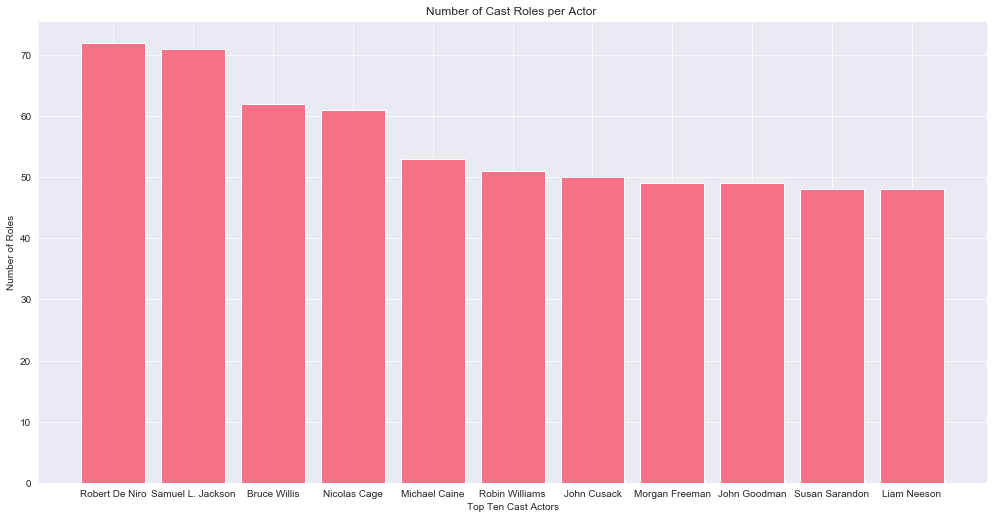

In [53]:
#plotting with matplotlib
#it says top ten actors but they are 11
plt.figure(figsize=(17.0,8.5))
plt.bar(top_10_actor['Actor'], top_10_actor['Count'])
plt.title('Number of Cast Roles per Actor ')
plt.ylabel('Number of Roles')
plt.xlabel('Top Ten Cast Actors');

#### Note:
We could take a look at the development of each actors career per year, but due to the amount of actors and also less relevance to our simply posed question we will leave this as it is. 


### Research Question 3: What kinds of properties are associated with movies achieving success
#### Reception, I have chosen to evaluate revenue as reception of the audience as it is more widely representing the audience than TMDBs popularity or vote rating.
##### To see if there is a 'secret sauce' to achieving good revenues, I will use these values to determine the correlation, dependent variables:
    1. Does a higher budget correlate with increased revenue?
    2. Does runtime correlate with increased revenue?
    3. Does a higher vote average coincide with higher revenue?
    4. Does a higher popularity correlate with a higher revenue?

In [54]:
# Quick view of the datafram that will be used for the third question
df_quant.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.98576,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,28.41994,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,13.11251,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,11.17310,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,9.33501,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052


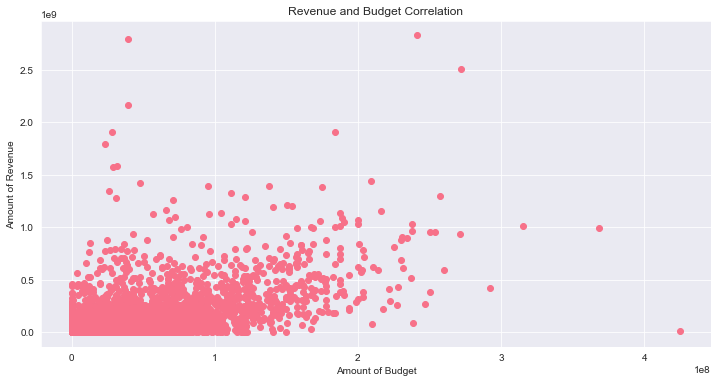

In [55]:
# 1. Does a higher budget correlate with the revenue?

# Relationship between revenue rate and budget
plt.figure(figsize=(12.0,6.0))
plt.scatter(df_quant['budget_adj'], df_quant['revenue_adj'], )
plt.title('Revenue and Budget Correlation')
plt.xlabel('Amount of Budget')
plt.ylabel('Amount of Revenue');

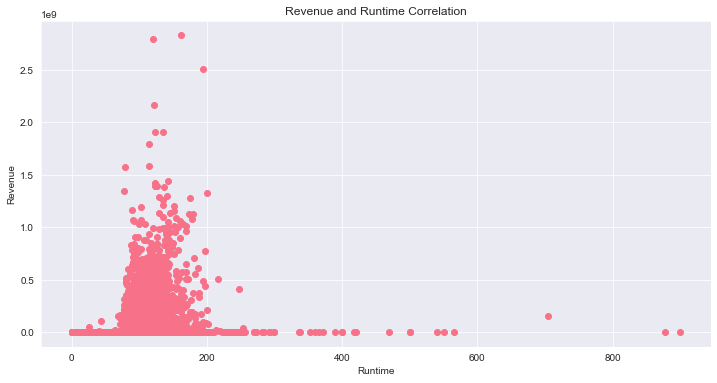

In [56]:
# 2. Does runtime correlate with the revenue?

# Relationship between vote count and revenue
plt.figure(figsize=(12.0,6.0))
plt.scatter(df_quant['runtime'], df_quant['revenue_adj'], )
plt.title('Revenue and Runtime Correlation')
plt.xlabel('Runtime')
plt.ylabel('Revenue');

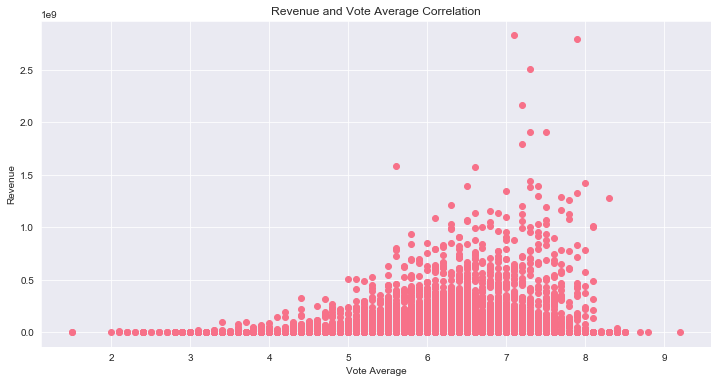

In [57]:
# 3. Does a higher vote average coincide with higher revenue?

# Relationship between vote average and revenue
plt.figure(figsize=(12.0,6.0))
plt.scatter(df_quant['vote_average'], df_quant['revenue_adj'], )
plt.title('Revenue and Vote Average Correlation')
plt.xlabel('Vote Average')
plt.ylabel('Revenue');

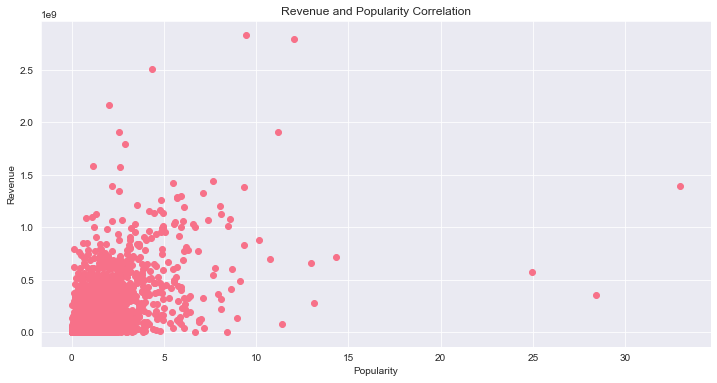

In [58]:
# 4. Does a higher popularity correlate with a higher revenue?

# Relationship between revenue and popularity rating
plt.figure(figsize=(12.0,6.0))
plt.scatter(df_quant['popularity'], df_quant['revenue_adj'], )
plt.title('Revenue and Popularity Correlation')
plt.xlabel('Popularity')
plt.ylabel('Revenue');

<a id='conclusions'></a>
## Conclusions
### Like the previous sections, I will divide this section into three parts, and discuss my findings from the analysis/results section below.
##### Section 1: Which genres are most popular from year to year?
##### Section 2: Actor popularity: Is there a particular actor/actress that is more cast than others?
##### Section 3: What kinds of properties are associated with movies achieving success
***

#### Section 1: Which genres are most popular from year to year?
In this section I ended up looking at the top 5 most popular movie genres year on year. In general I thought that it was clear that as it seems that the number of moives have increased over the years the most popular genres have had similar developments in the amount of increase in movies for each popular genre. The reason for why movies and some genres have increased in sheer numbers are not included or explored in this analysis.
The top 5 most popular genres in ascending order were:
1. Drama
2. Comedy
3. Thriller
4. Action
5. Romance
***

#### Section 2: Actor popularity: Is there a particular actor/actress that is more cast than others?
This section was both simpler in manner and results.
The 11 most cast actors/actresses in the dataset were:
1. Robert De Niro
2. Samuel L. Jackson
3. Bruce Willis
4. Nicolas Cage
5. Michael Caine
6. Robin Williams
7. John Cusack
8. John Goodman
9. Morgan Freeman
10. Liam Neeson and Susan Sarandon
***

#### Section 3: What kinds of properties are associated with movies achieving success
In the last section, I chose to evaluate the reception of a movie based on their revenue. The reason explained earlier because that gives is a larger perception of how it was received by the general audience rather than invested movie enthusiasts writing reviews. Thus, revenue is the dependent variable that we're examining.

The indpendent variables we examined were: budget, runtime, vote average, popularity

1. Budget

    1. The budget has a weak correlation with increasing revenue as the budget increases. It seems like after between 125-150 million dollars, the returns are deaprecciating in terms of increasing the revenue.

2. Runtime

    1. Had an interesting correlation with increasing the budget. Once the runtime hits the sweet spot between 100-120 minutes it has no increased effect, but also most movies are generally in that range in minutes, so it is no significant indicator that runtime would affect much, barely any correlation at all.
    
3. Vote average

    1. Ranging from 5.5 and 7.5 in vote range correlated with an increase in revenue. This is also a weak but actually the strogest correlation that we have, as a slightly positive correlation from 0 to 7.5 until it starts to drop and the rewards (vote average) are diminishing in their returns in terms of more revenue.

4. Popularity
    
    1. The popularity rating from TMDB showed no signs of correlation with the increase in revenue. In the beginning of the graph, a low budget and low popularity seems prevalent, however as popularity increases the revenue does not follow suit and the dots are scattered over the graph as the value 5 in popularity is reached.
 

#### Limitations:

This project has no strong conclusive data on causal relationships.
This project has investigated relational and correlational links, which can indicate that there is a relationship. The independent variables have not been manipulated.

# References Used, Tips, Tricks, and Code
***
- Suppressing scientific Notation
    - https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
- Splitting '|' separated strings inside columns and stacking (inroducing a new concept to me) them into rows and indexed by the id:
    - https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e
- Popularity score explained by the movie database:
    - https://developers.themoviedb.org/3/getting-started/popularity#movies
- Notes from the classroom from udacity.com
    - https://classroom.udacity.com/nanodegrees/nd002/
- Useful Documentation:
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html
    - https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#pivot-tables
        - not used but interesting and helped me look around in the documentation to understand stack() better
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html
    - https://matplotlib.org/3.3.0/contents.html
    - https://seaborn.pydata.org/tutorial/aesthetics.html
    - https://seaborn.pydata.org/generated/seaborn.set_palette.html#seaborn.set_palette
    - https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette